<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/autoencoder_clustering_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering by Auto Encoder for Iris data set

In [42]:
import numpy as np
from sklearn import datasets, model_selection

iris = datasets.load_iris()

x_train, x_test, label_train, label_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.20)

#print(type(iris))
#print(iris.keys())
#print(x_train)
#print(x_test)

In [43]:
from keras.layers import Input, Dense, Activation
from keras.models import Sequential
from keras.models import Model
from keras.datasets import mnist
from keras.optimizers.legacy import SGD
from keras.optimizers.schedules import ExponentialDecay
import numpy as np

encoding_dim = 10

In [44]:
# Model definition
input_img = Input(shape=(4,))
#model = Sequential()
#model.add(Dense(encoding_dim, input_shape=(784,)))
#model.add(Activation('softmax'))
#model.add(Dense(784))
encoded = Dense(encoding_dim, activation='softmax', name='encoded')(input_img)
decoded = Dense(4)(encoded)
model = Model(inputs=input_img, outputs=decoded)


# Pring the model
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 encoded (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 4)                 44        
                                                                 
Total params: 94 (376.00 Byte)
Trainable params: 94 (376.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Optimizer
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)

sgd = SGD(learning_rate=lr_schedule, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

In [46]:
# training the model
nepoch=5000
results = model.fit(x_train, x_train, epochs=nepoch, batch_size=5, shuffle=True, verbose=2,
                                        validation_data=(x_test, x_test))


# save the model
model.save_weights('autoencoder.h5')

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 2501/5000
24/24 - 0s - loss: 0.0303 - mae: 0.1341 - val_loss: 0.0390 - val_mae: 0.1476 - 81ms/epoch - 3ms/step
Epoch 2502/5000
24/24 - 0s - loss: 0.0308 - mae: 0.1345 - val_loss: 0.0405 - val_mae: 0.1503 - 82ms/epoch - 3ms/step
Epoch 2503/5000
24/24 - 0s - loss: 0.0300 - mae: 0.1327 - val_loss: 0.0447 - val_mae: 0.1628 - 81ms/epoch - 3ms/step
Epoch 2504/5000
24/24 - 0s - loss: 0.0309 - mae: 0.1371 - val_loss: 0.0394 - val_mae: 0.1479 - 91ms/epoch - 4ms/step
Epoch 2505/5000
24/24 - 0s - loss: 0.0303 - mae: 0.1325 - val_loss: 0.0390 - val_mae: 0.1482 - 82ms/epoch - 3ms/step
Epoch 2506/5000
24/24 - 0s - loss: 0.0309 - mae: 0.1345 - val_loss: 0.0393 - val_mae: 0.1491 - 90ms/epoch - 4ms/step
Epoch 2507/5000
24/24 - 0s - loss: 0.0303 - mae: 0.1330 - val_loss: 0.0414 - val_mae: 0.1518 - 92ms/epoch - 4ms/step
Epoch 2508/5000
24/24 - 0s - loss: 0.0313 - mae: 0.1354 - val_loss: 0.0390 - val_mae: 0.1479 - 87ms/epoch - 4ms/step
Epoch 2509/5000
24/24 - 0s - los

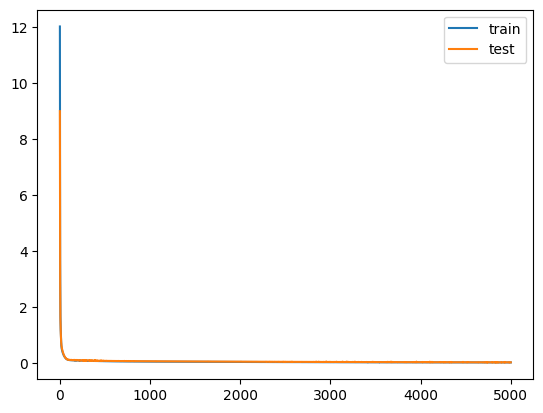

In [47]:
# display the leraning curve
%matplotlib inline
import matplotlib.pyplot as plt

x = range(nepoch)
plt.plot(x, results.history['loss'], label='train')
plt.legend(loc='upper right')
plt.plot(x, results.history['val_loss'], label='test')
plt.legend(loc='upper right')

In [48]:
decoded = model.predict(iris.data)
print(decoded)

5/5 [==============================] - 0s 2ms/step
[[5.0306625  3.472423   1.4492084  0.21983254]
 [4.845123   3.0789313  1.626429   0.23900467]
 [4.835395   3.2185278  1.5361526  0.2261765 ]
 [4.794741   3.0986543  1.6678168  0.26867098]
 [5.031138   3.5216317  1.4271469  0.21969986]
 [5.3156934  3.8297124  1.4387276  0.3043552 ]
 [4.9035883  3.3757546  1.5389668  0.2827184 ]
 [4.9886003  3.3775744  1.5302578  0.24170709]
 [4.67437    2.934926   1.7082899  0.2679448 ]
 [4.838055   3.0838857  1.6291665  0.21565092]
 [5.164334   3.6338573  1.405717   0.22361821]
 [4.941328   3.330263   1.5942321  0.2688592 ]
 [4.7752643  3.0094576  1.6250461  0.205288  ]
 [4.613023   2.9898539  1.5461799  0.18058366]
 [5.2834826  3.8755856  1.2050935  0.1762482 ]
 [5.4625983  4.129181   1.2028496  0.24153548]
 [5.2774186  3.8652544  1.2869515  0.23854667]
 [5.0742226  3.526108   1.4563805  0.25089753]
 [5.3225374  3.7679482  1.442138   0.27384764]
 [5.1586204  3.698421   1.4055166  0.25706792]
 [5.11232

In [49]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('encoded').output)
# Pring the model
feature_extractor.summary()
encoded_features = feature_extractor.predict(iris.data)
print(encoded_features)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 encoded (Dense)             (None, 10)                50        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [==============================] - 0s 2ms/step
[[3.8393822e-02 8.2839258e-02 3.9787441e-02 ... 5.2881980e-01
  5.6088483e-03 4.5276375e-04]
 [6.5464526e-02 1.2218026e-01 4.8160978e-02 ... 4.3084210e-01
  1.0478540e-02 8.2056801e-04]
 [4.9189620e-02 9.7309701e-02 5.3252909e-02 ... 4.5958942e-01
  8.3672954e-03 7.9000712e-04]
 ...
 [1.0226311e-01 1.6183490e-02 1.9498405e-01 ... 1.4896761e-01
  3.6660661e-03 3.8406

In [50]:
print('Shape is ', encoded_features.shape)
cluster = encoded_features.argmax(axis=1)
#print(cluster)
#print(cluster[cluster==0])
for k in range(encoding_dim):
    print('=============================================')
    print('k=', k)
    print('=============================================')
    for i in range(len(iris.data)):
        cl = cluster[i]
        if (cl==k):
            print(i)

Shape is  (150, 10)
k= 0
60
62
93
k= 1
k= 2
106
k= 3
k= 4
k= 5
50
51
52
53
54
55
56
58
59
61
63
65
66
67
68
69
70
71
72
73
74
75
76
77
78
80
81
82
83
84
85
86
87
88
89
90
91
92
94
95
96
97
99
100
101
102
103
104
105
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
k= 6
k= 7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
57
64
79
98
k= 8
k= 9


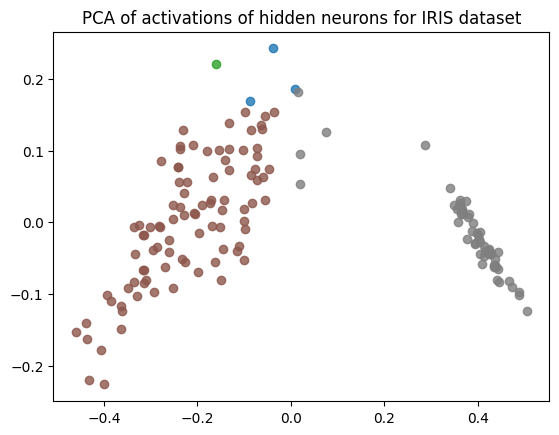

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit(encoded_features).transform(encoded_features)
for i in range(encoding_dim):
    plt.scatter(pca_features[cluster == i, 0], pca_features[cluster == i, 1], alpha=.8)
plt.title('PCA of activations of hidden neurons for IRIS dataset')
plt.show()